In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [5]:
# Use raw strings to avoid escape sequences
train_dir = r'G:\ddatasets\Split_smol\train'
val_dir = r'G:\ddatasets\Split_smol\val'

# Alternatively, use forward slashes
# train_dir = 'G:/ddatasets/Split_smol/train'
# val_dir = 'G:/ddatasets/Split_smol/val'

train_dataset = image_dataset_from_directory(train_dir, 
                                             image_size=(224, 224),
                                             batch_size=32)
val_dataset = image_dataset_from_directory(val_dir, 
                                           image_size=(224, 224),
                                           batch_size=32)

Found 697 files belonging to 9 classes.
Found 181 files belonging to 9 classes.


In [6]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

In [8]:
# Save the class names from the dataset creation
train_dataset = image_dataset_from_directory(
    train_dir, 
    image_size=(224, 224), 
    batch_size=32
)
val_dataset = image_dataset_from_directory(
    val_dir, 
    image_size=(224, 224), 
    batch_size=32
)

# Save class names
class_names = train_dataset.class_names

# Preprocess datasets for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Use the class names when defining the output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


Found 697 files belonging to 9 classes.
Found 181 files belonging to 9 classes.


In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3340 - loss: 1.9104 - val_accuracy: 0.6022 - val_loss: 1.0814
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6380 - loss: 1.0586 - val_accuracy: 0.6851 - val_loss: 0.8077
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7385 - loss: 0.7658 - val_accuracy: 0.7127 - val_loss: 0.7540
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7403 - loss: 0.6526 - val_accuracy: 0.7403 - val_loss: 0.7051
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7975 - loss: 0.5288 - val_accuracy: 0.7514 - val_loss: 0.6474
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8093 - loss: 0.5117 - val_accuracy: 0.7735 - val_loss: 0.6111
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8240 - loss: 0.5095 - val_accuracy: 0.7790 - val_loss: 0.5991
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8226 - loss: 0.4731 - val_accuracy: 0.7680 - val_loss:

In [12]:
model.save("cancer_diagnosis_model.keras", include_optimizer=False)


In [13]:
from tensorflow.keras.models import load_model

model = load_model("cancer_diagnosis_model.keras")


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# ---------------------------
# 1. Plot Training History (Accuracy and Loss)
# ---------------------------
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

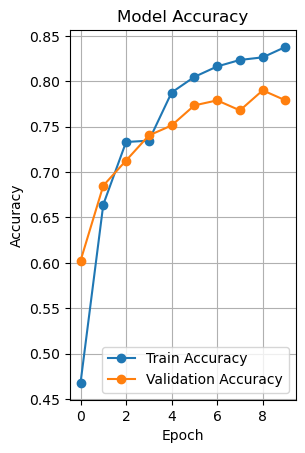

In [17]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

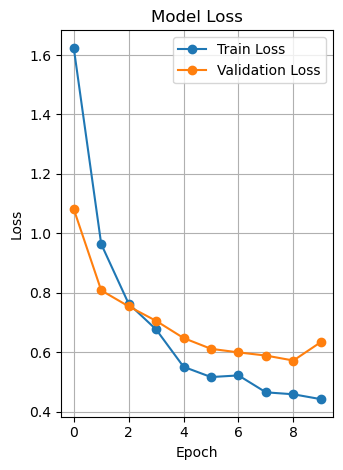

In [18]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step 


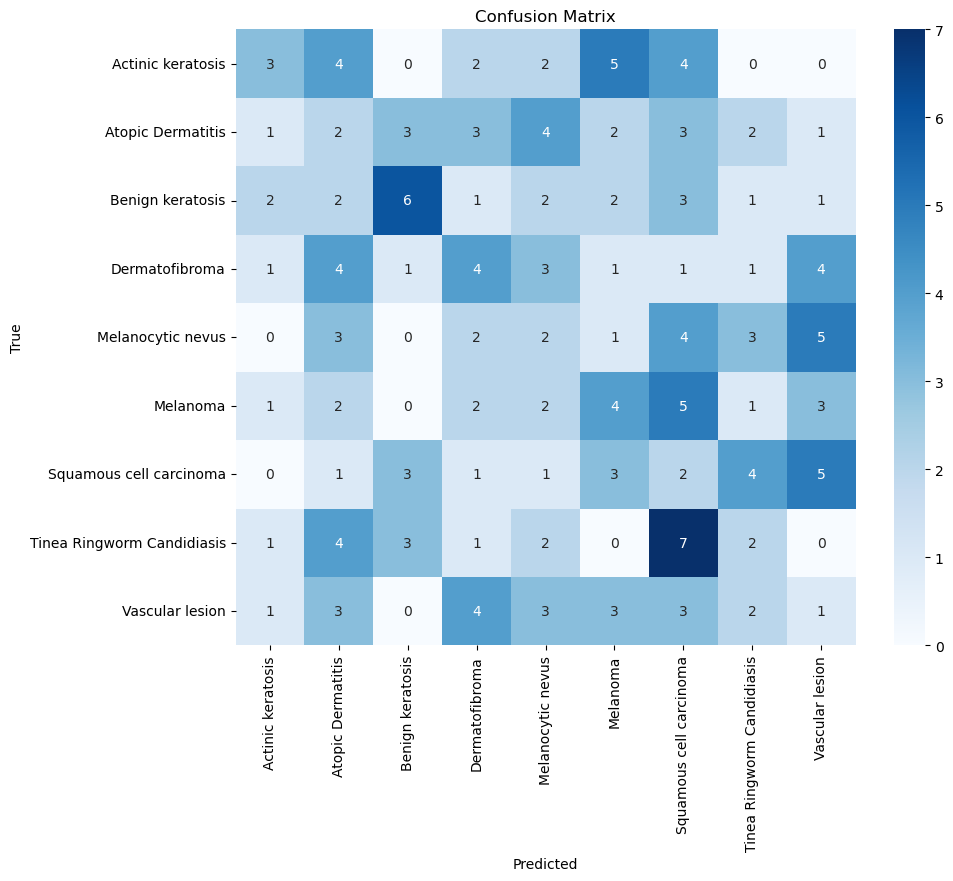

In [19]:
# ---------------------------
# 2. Plot Confusion Matrix
# ---------------------------
# Generate predictions for the validation dataset
y_pred = model.predict(val_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)
# Get true labels from validation dataset
y_true = np.concatenate([y for _, y in val_dataset], axis=0)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [20]:
from collections import Counter
from tensorflow.data import Dataset

# Count class occurrences in the original training dataset
original_class_counts = Counter([int(label.numpy()) for _, label in train_dataset.unbatch()])
print("Original class counts:", original_class_counts)

# Unbatch the training dataset
unbatched_train_dataset = train_dataset.unbatch()

# Create separate datasets per class
class_datasets = {
    i: unbatched_train_dataset.filter(lambda x, y: tf.equal(y, i))
    for i in range(len(original_class_counts))
}

# Oversample one of the classes (e.g., class 7) to balance the dataset
largest_class_size = max(original_class_counts.values())
class_7_size = original_class_counts[7]
repetitions = (largest_class_size // class_7_size) + 1
oversampled_class_7 = class_datasets[7].repeat(repetitions).take(largest_class_size)

# Exclude original class 7 samples and concatenate oversampled class 7
balanced_train_dataset = unbatched_train_dataset.filter(lambda x, y: tf.not_equal(y, 7))
balanced_train_dataset = balanced_train_dataset.concatenate(oversampled_class_7).shuffle(1000)
balanced_train_dataset = balanced_train_dataset.batch(32)


Original class counts: Counter({1: 81, 5: 80, 8: 80, 0: 80, 6: 80, 2: 80, 3: 80, 4: 80, 7: 56})


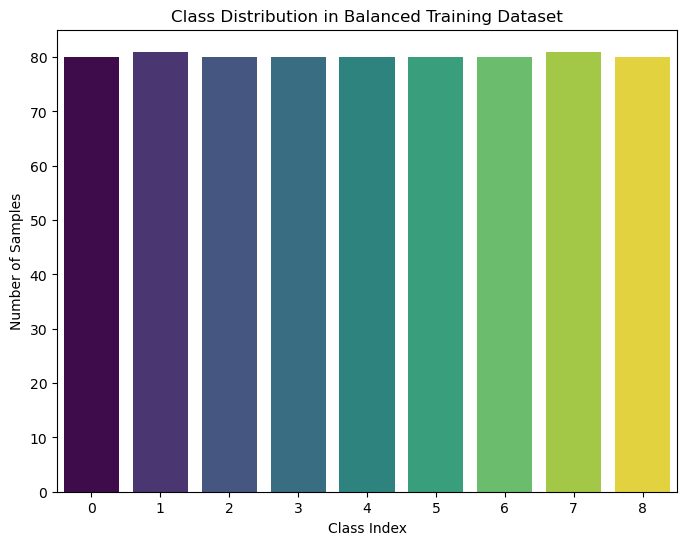

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Unbatch the balanced training dataset to count labels
balanced_class_counts = Counter([int(label.numpy()) for _, label in balanced_train_dataset.unbatch()])

# Create a bar plot for class distribution with hue and no legend
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(balanced_class_counts.keys()),
    y=list(balanced_class_counts.values()),
    hue=list(balanced_class_counts.keys()),
    dodge=False,
    palette="viridis"
)
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Balanced Training Dataset')
plt.legend([],[], frameon=False)  # Disable the legend
plt.show()


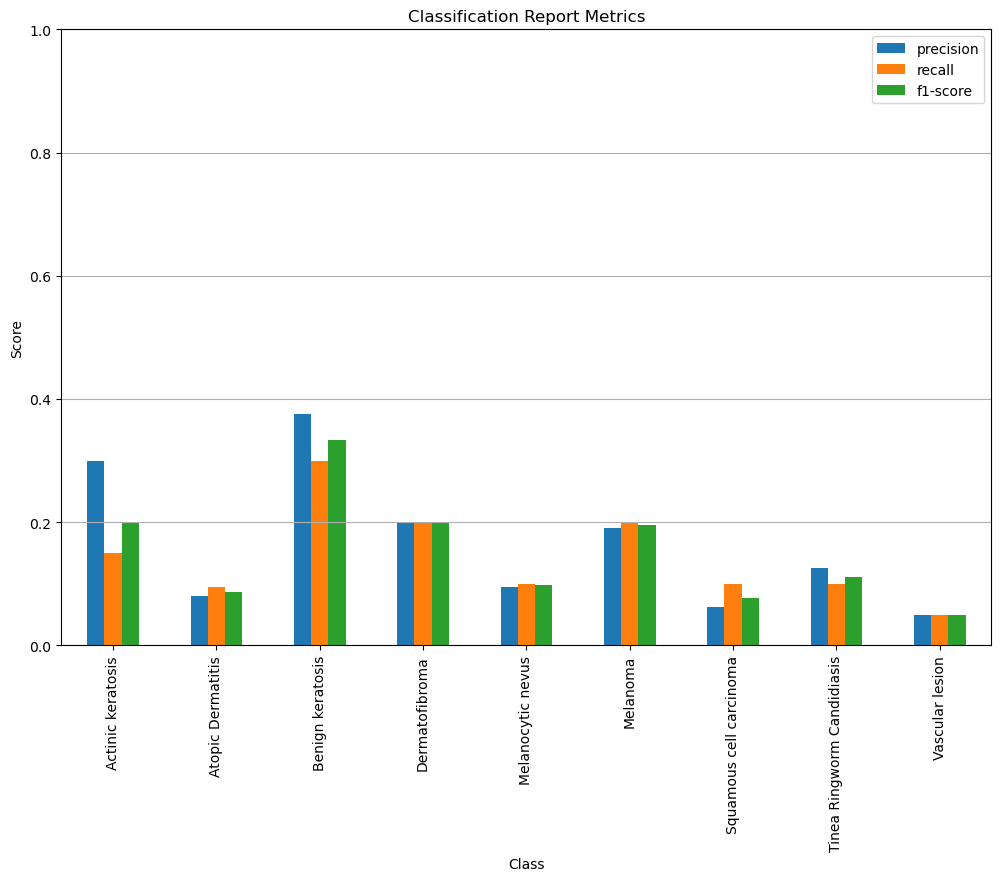

In [22]:
# ---------------------------
# 4. Plot Classification Report Metrics
# ---------------------------
# Get classification report as a dictionary
report = classification_report(y_true, y_pred_labels, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Remove 'support' column if not needed
if 'support' in report_df.columns:
    report_df = report_df.drop(columns=['support'])

# Plot the precision, recall, and f1-score for each class
report_df.iloc[:-3].plot(kind='bar', figsize=(12, 8))
plt.title("Classification Report Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

In [23]:
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r'G:\ddatasets\Split_smol\val\Actinic keratosis\ISIC_0025803.jpg'

# Load and preprocess the image
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

# Replace 'class_names' if it was saved earlier
print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Class: Tinea Ringworm Candidiasis with probability 0.6084054708480835


In [24]:
from tensorflow.keras.applications.efficientnet import preprocess_input

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)  # Use EfficientNet preprocessing
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

print(f"Predicted Class: {class_names[class_index]} with probability {probability}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Class: Squamous cell carcinoma with probability 0.9263055324554443


In [25]:

import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Atopic Dermatitis\1_19.jpg"


# Load and preprocess the image
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

# Replace 'class_names' if it was saved earlier
print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Class: Tinea Ringworm Candidiasis with probability 0.6085646748542786


In [26]:

import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Melanoma\ISIC_0000166.jpg"


# Load and preprocess the image
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

# Replace 'class_names' if it was saved earlier
print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Class: Tinea Ringworm Candidiasis with probability 0.6106973886489868


In [27]:
#to see the top 3 predictions

import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)[0]  # Get the vector for the image
top_n = 3
top_indices = np.argsort(predictions)[-top_n:][::-1]  # Indices of top 3 predictions

# Print the top 3 predicted classes with their probabilities
for i in top_indices:
    print(f"Predicted Class: {class_names[i]} with probability {predictions[i]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted Class: Melanoma with probability 0.8907
Predicted Class: Melanocytic nevus with probability 0.1071
Predicted Class: Benign keratosis with probability 0.0011


In [28]:
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Dermatofibroma\ISIC_0030555.jpg"


# Load and preprocess the image
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

# Replace 'class_names' if it was saved earlier
print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Class: Tinea Ringworm Candidiasis with probability 0.6078138947486877


In [29]:
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Melanoma\ISIC_0009918.jpg"


# Load and preprocess the image
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

# Replace 'class_names' if it was saved earlier
print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted Class: Tinea Ringworm Candidiasis with probability 0.60813969373703


In [30]:
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Dermatofibroma\ISIC_0030555.jpg"

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)  # Use EfficientNet preprocessing
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

print(f"Predicted Class: {class_names[class_index]} with probability {probability}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Class: Dermatofibroma with probability 0.4710072875022888


In [31]:
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Melanoma\ISIC_0009918.jpg"

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)  # Use EfficientNet preprocessing
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: Melanoma with probability 0.5762210488319397


In [32]:
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Atopic Dermatitis\1_19.jpg"

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)  # Use EfficientNet preprocessing
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted Class: Atopic Dermatitis with probability 0.9999744892120361


In [33]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fine-tune the model (adjust epochs as needed)
history_finetune = model.fit(
    train_dataset, 
    validation_data=val_dataset, 
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8443 - loss: 0.4274 - val_accuracy: 0.7514 - val_loss: 0.6877
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8093 - loss: 0.5082 - val_accuracy: 0.7680 - val_loss: 0.6737
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8152 - loss: 0.5378 - val_accuracy: 0.7569 - val_loss: 0.6630
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8097 - loss: 0.4963 - val_accuracy: 0.7569 - val_loss: 0.6544
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8239 - loss: 0.4576 - val_accuracy: 0.7624 - val_loss: 0.6474
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8436 - loss: 0.3796 - val_accuracy: 0.7790 - val_loss: 0.6430
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8375 - loss: 0.4732 - val_accuracy: 0.7845 - val_loss: 0.6395
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8450 - loss: 0.4373 - val_accuracy: 0.7790 - val_loss:

In [35]:
model.save("cancer_diagnosis_model.keras")


In [36]:
from tensorflow.keras.models import load_model

# Save the trained model
model.save("cancer_diagnosis_model.keras")

print("Model saved successfully!")


Model saved successfully!


In [37]:
import shutil

shutil.move("cancer_diagnosis_model.keras", r"G:\cancer_diagnosis_app\cancer_diagnosis_model.keras")

print("Model moved successfully!")


Model moved successfully!


In [38]:
model.save("cancer_diagnosis_model.keras")


In [39]:
print(predictions)


[[2.8857257e-06 9.9997449e-01 1.5284981e-05 1.3231031e-06 8.1182588e-07
  1.4097907e-06 2.7823870e-07 4.4151179e-07 3.0013809e-06]]


In [40]:
print("Predictions:", predictions)
print("Predicted Index:", predicted_index)
print("Class Labels:", class_labels)


Predictions: [[2.8857257e-06 9.9997449e-01 1.5284981e-05 1.3231031e-06 8.1182588e-07
  1.4097907e-06 2.7823870e-07 4.4151179e-07 3.0013809e-06]]


NameError: name 'predicted_index' is not defined

In [41]:
print("Raw Predictions:", predictions)
print("Predictions Shape:", predictions.shape)


Raw Predictions: [[2.8857257e-06 9.9997449e-01 1.5284981e-05 1.3231031e-06 8.1182588e-07
  1.4097907e-06 2.7823870e-07 4.4151179e-07 3.0013809e-06]]
Predictions Shape: (1, 9)


In [42]:
import numpy as np

# Example class labels (Update according to your model's classes)
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8"]

predictions = model.predict(image)  # Your model's prediction

if predictions.size == 0:
    print("Error: Empty prediction output!")
else:
    predicted_index = np.argmax(predictions)  # Get the highest probability index

    # Debugging
    print("Predicted Index:", predicted_index)
    print("Predictions:", predictions)

    # Ensure index is within range
    if predicted_index >= len(class_labels):
        print("Error: Predicted index out of range")
    else:
        predicted_class = class_labels[predicted_index]
        confidence = float(predictions[0][predicted_index])
        print("Predicted Class:", predicted_class)
        print("Confidence Score:", confidence)


NameError: name 'image' is not defined

In [43]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Example class labels (Update these based on your model)
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", 
                "Class 5", "Class 6", "Class 7", "Class 8"]

# Load the image correctly
img_path = r"G:\ddatasets\Split_smol\val\Atopic Dermatitis\1_19.jpg"  # <-- Replace with the actual image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize based on your model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model input shape
img_array = preprocess_input(img_array)  # Apply preprocessing based on model type

# Make predictions
predictions = model.predict(img_array)

# Debugging: Ensure predictions are not empty
if predictions.size == 0:
    print("Error: Empty prediction output!")
else:
    predicted_index = np.argmax(predictions)  # Get the highest probability index

    # Debugging
    print("Predicted Index:", predicted_index)
    print("Predictions:", predictions)

    # Ensure index is within range
    if predicted_index >= len(class_labels):
        print("Error: Predicted index out of range")
    else:
        predicted_class = class_labels[predicted_index]
        confidence = float(predictions[0][predicted_index])
        print("Predicted Class:", predicted_class)
        print("Confidence Score:", confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Index: 7
Predictions: [[0.0298428  0.07282337 0.00612166 0.03161486 0.01660665 0.02640881
  0.00531622 0.69083357 0.12043213]]
Predicted Class: Class 7
Confidence Score: 0.690833568572998


In [44]:
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Atopic Dermatitis\1_19.jpg"

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)  # Use EfficientNet preprocessing
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Predicted Class: Atopic Dermatitis with probability 0.9999736547470093


In [45]:
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Melanoma\ISIC_0009918.jpg"

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)  # Use EfficientNet preprocessing
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted Class: Melanoma with probability 0.56503826379776


In [46]:
import os

# Define the path to your dataset
dataset_path = r"G:\ddatasets\Split_smol\train"  # Use 'train' as it contains all classes

# Get class names from folder names
class_names = sorted(os.listdir(dataset_path))

# Print class names with their corresponding indices
class_labels = {i: class_name for i, class_name in enumerate(class_names)}
print(class_labels)


{0: 'Actinic keratosis', 1: 'Atopic Dermatitis', 2: 'Benign keratosis', 3: 'Dermatofibroma', 4: 'Melanocytic nevus', 5: 'Melanoma', 6: 'Squamous cell carcinoma', 7: 'Tinea Ringworm Candidiasis', 8: 'Vascular lesion'}


In [48]:

from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow as tf

# Replace with the actual path to your image
image_path = r"G:\ddatasets\Split_smol\val\Melanoma\ISIC_0009918.jpg"

# Load and preprocess the image properly
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = preprocess_input(img_array)  # Use EfficientNet preprocessing
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
probability = np.max(predictions)

print(f"Predicted Class: {class_names[class_index]} with probability {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted Class: Melanoma with probability 0.56503826379776
